<a href="https://colab.research.google.com/github/juliablaz2003/UFV_visualizacion/blob/main/Ejercicios%20de%20clase/clase2_18oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRACTICA 1

In [3]:
import pandas as pd

# Enlace al archivo CSV en la versión "raw" de GitHub
url = '/content/datos_ejercicio_ventas.csv'

# Leer el archivo CSV directamente desde GitHub
df = pd.read_csv(url, sep = ',')

# Mostrar las primeras filas del DataFrame
df.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


In [4]:
print(df.columns)

Index(['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'FORECAST',
       'FORECAST_YEAR', 'AMOUNT'],
      dtype='object')


In [5]:
print(df.dtypes)

COUNTRY           object
SUBBRAND          object
YEAR               int64
MONTH              int64
SCENARIO          object
FORECAST          object
FORECAST_YEAR    float64
AMOUNT           float64
dtype: object


1. Número de filas

In [6]:
# Número de filas
num_filas = df.shape[0]
print(f"Número de filas: {num_filas}")

Número de filas: 18666


2. Número de "actuals" y "forecasts"

In [7]:
# Número de actuals y forecasts
num_actuals = df[df['SCENARIO'] == 'actual'].shape[0]
num_forecasts = df[df['SCENARIO'] == 'AI_forecast'].shape[0]

print(f"Número de actuals: {num_actuals}")
print(f"Número de forecasts: {num_forecasts}")

Número de actuals: 900
Número de forecasts: 17766


3. Horizonte de predicción

Este dato está relacionado con la columna FORECAST que contiene información sobre cuándo se realizó la predicción. Podemos extraer el horizonte de predicción.

NO ESTA BIEN

In [8]:
# Paso 1: Extraer el mes de la predicción desde la columna 'FORECAST'
df['FORECAST_MONTH'] = df['FORECAST'].str.extract(r'P(\d{2})').astype(float) - 1

# Paso 2: Calcular el horizonte de predicción como la diferencia entre la fecha de la predicción y la fecha de la venta
df['HORIZONTE_PREDICCION'] = (df['YEAR'] - df['FORECAST_YEAR']) * 12 + (df['MONTH'] - df['FORECAST_MONTH'])

# Mostrar las primeras filas para verificar que el cálculo sea correcto
df[['YEAR', 'MONTH', 'FORECAST_YEAR', 'FORECAST', 'FORECAST_MONTH', 'HORIZONTE_PREDICCION']].head()

,YEAR,MONTH,FORECAST_YEAR,FORECAST,FORECAST_MONTH,HORIZONTE_PREDICCION
0,2023,12,2023.0,AI_P02F,1.0,11.0
1,2023,12,2023.0,AI_P10F,9.0,3.0
2,2023,12,2023.0,AI_P09F,8.0,4.0
3,2024,12,2023.0,AI_P10F,9.0,15.0
4,2023,9,2023.0,AI_P03F,2.0,7.0


In [9]:
# Reemplazamos los valores de FORECAST para obtener los meses correspondientes
# AI_P02F = enero, AI_P03F = febrero, ..., AI_PF = diciembre (AI_PF corresponde a diciembre)

# Creamos un diccionario para asignar los meses correctos
forecast_to_month = {
    'AI_P02F': 1,
    'AI_P03F': 2,
    'AI_P04F': 3,
    'AI_P05F': 4,
    'AI_P06F': 5,
    'AI_P07F': 6,
    'AI_P08F': 7,
    'AI_P09F': 8,
    'AI_P10F': 9,
    'AI_P11F': 10,
    'AI_P12F': 11,
    'AI_PF': 12  # AI_PF corresponde a diciembre
}

# Creamos una nueva columna con los meses correctos basados en FORECAST
df['FORECAST_MONTH'] = df['FORECAST'].map(forecast_to_month)

# Ahora ordenamos el dataframe por YEAR, FORECAST_YEAR, y FORECAST_MONTH
df_sorted = df[df['SCENARIO'] == 'AI_forecast'].sort_values(by=['YEAR', 'FORECAST_YEAR', 'FORECAST_MONTH']).reset_index(drop=True)

df_sorted.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT,FORECAST_MONTH,HORIZONTE_PREDICCION
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,7.543562e+05,1.0,11.0
1,Great Britain,Pepsi Max (L3),2023,9,AI_forecast,AI_P02F,2023.0,1.138557e+07,1.0,8.0
2,Italy,7up (L3),2023,6,AI_forecast,AI_P02F,2023.0,1.867226e+04,1.0,5.0
3,Great Britain,7up (L3),2023,11,AI_forecast,AI_P02F,2023.0,2.491286e+05,1.0,10.0
4,Hungary,Mountain Dew (L3),2023,5,AI_forecast,AI_P02F,2023.0,4.003815e+04,1.0,4.0


4. Número de países y de productos

Vamos a contar el número de países únicos en la columna COUNTRY y el número de marcas/productos únicos en la columna SUBBRAND.

In [10]:
# Número de países y productos
num_paises = df['COUNTRY'].nunique()
num_productos = df['SUBBRAND'].nunique()

# Listado de países y productos únicos
paises_unicos = df['COUNTRY'].unique()
productos_unicos = df['SUBBRAND'].unique()

print(f"Número de países: {num_paises}")
print(paises_unicos)
print(f"\nNúmero de productos: {num_productos}")
print(productos_unicos)

Número de países: 9
['Portugal' 'Great Britain' 'Spain' 'Hungary' 'Norway' 'Denmark'
 'Netherlands' 'Italy' 'Czech']

Número de productos: 6
['Lipton (L3)' 'Pepsi Max (L3)' '7up (L3)' 'Pepsi Regular (L3)'
 'Mountain Dew (L3)' '7up Free (L3)']


5. Histórico de actuals/forecast

Contiene ventas reales, con los registros etiquetados como "actual" en la columna SCENARIO. Estos registros no tienen columnas relacionadas con predicciones, ya que se trata de ventas realizadas.

In [11]:
historico_actuals = df[df['SCENARIO'] == 'actual'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'AMOUNT']]

historico_actuals.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,AMOUNT
277,Portugal,Pepsi Max (L3),2023,10,actual,1.885949e+05
278,Portugal,7up (L3),2023,3,actual,2.934971e+05
279,Portugal,7up (L3),2023,10,actual,3.484466e+05
280,Great Britain,7up Free (L3),2023,10,actual,1.172553e+06
281,Norway,Pepsi Regular (L3),2023,10,actual,3.784859e+04


Contiene las predicciones realizadas, etiquetadas como AI_forecast, con valores en las columnas FORECAST y FORECAST_YEAR, además de la cantidad pronosticada en AMOUNT.

In [12]:
historico_forecasts = df[df['SCENARIO'] == 'AI_forecast'][['COUNTRY', 'SUBBRAND', 'YEAR', 'MONTH', 'SCENARIO', 'FORECAST', 'FORECAST_YEAR', 'AMOUNT']]

historico_forecasts.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


6. Cuántas ejecuciones de forecast hay

Para obtener esto, podemos agrupar por FORECAST_YEAR y contar cuántas ejecuciones de forecast se han hecho por año.

In [13]:
# Cuántas ejecuciones de forecast hay por año
ejecuciones_forecast = df[df['SCENARIO'] == 'AI_forecast'].groupby('FORECAST_YEAR').size()

print("Ejecuciones de forecast por año:")
print(ejecuciones_forecast)

Ejecuciones de forecast por año:
FORECAST_YEAR
2023.0    17766
dtype: int64


In [14]:
# Contar el número de ejecuciones de forecast en función de la columna FORECAST
ejecuciones_por_forecast = df[df['SCENARIO'] == 'AI_forecast'].groupby('FORECAST').size()

# Mostrar los resultados por tipo de forecast
ejecuciones_por_forecast


,0
FORECAST,
AI_P02F,1278
AI_P03F,1278
AI_P04F,1476
AI_P05F,1494
AI_P06F,1422
AI_P07F,1476
AI_P08F,1566
AI_P09F,1566
AI_P10F,1620


7. Forecasts distintos

Aquí contamos los valores únicos en la columna FORECAST.

In [15]:
# Forecasts distintos
forecast_distintos = df['FORECAST'].nunique()
print(f"Forecasts distintos: {forecast_distintos}")

Forecasts distintos: 12


8. Distribución de ventas realizadas

Podemos hacer un análisis de cómo se distribuyen las ventas por país, mes y año, y por marca.

GRÁFICO DE BIGOTES O HISTOGRAMA

In [16]:
# Distribución de ventas por país
ventas_pais = df.groupby('COUNTRY')['AMOUNT'].sum()

# Distribución de ventas por mes y año
ventas_mes_anio = df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

# Distribución de ventas por marca
ventas_marca = df.groupby('SUBBRAND')['AMOUNT'].sum()

print("Distribución de ventas por país:")
print(ventas_pais)
print("\nDistribución de ventas por mes y año:")
print(ventas_mes_anio)
print("\nDistribución de ventas por marca:")
print(ventas_marca)

Distribución de ventas por país:
COUNTRY
Czech            6.384946e+08
Denmark          3.173959e+09
Great Britain    8.427775e+09
Hungary          1.104465e+09
Italy            5.058963e+08
Netherlands      1.831524e+09
Norway           1.858965e+09
Portugal         3.871816e+08
Spain            2.184936e+08
Name: AMOUNT, dtype: float64

Distribución de ventas por mes y año:
YEAR  MONTH
2023  1        9.310165e+07
      2        1.612275e+08
      3        2.696923e+08
      4        3.353694e+08
      5        4.550054e+08
      6        5.304364e+08
      7        6.288473e+08
      8        7.474676e+08
      9        7.679450e+08
      10       7.890140e+08
      11       9.085069e+08
      12       1.049411e+09
2024  1        8.448844e+08
      2        8.408047e+08
      3        1.009033e+09
      4        9.872097e+08
      5        1.065666e+09
      6        1.057691e+09
      7        9.981979e+08
      8        9.357902e+08
      9        7.411355e+08
      10       6.1686

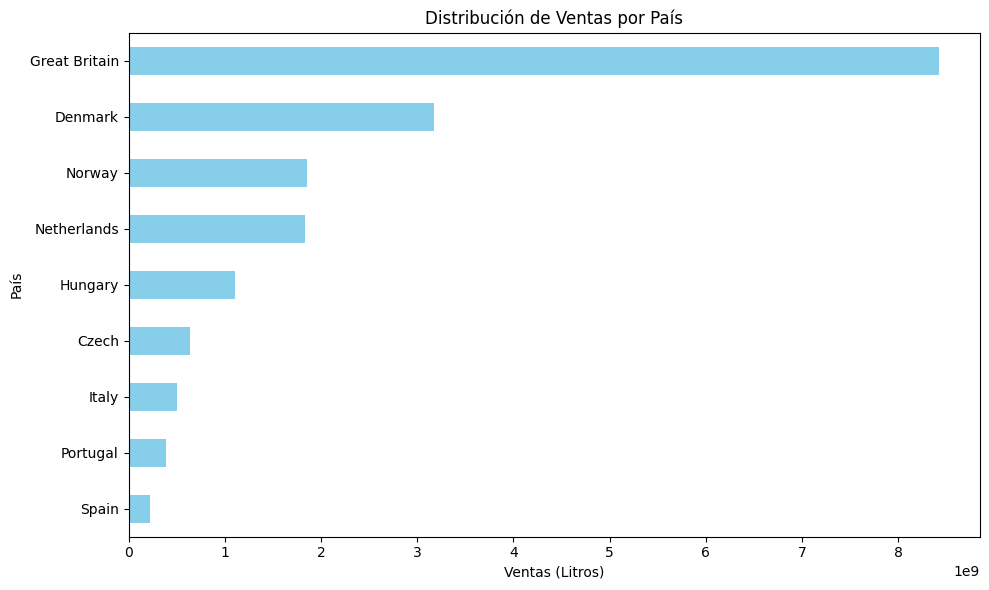

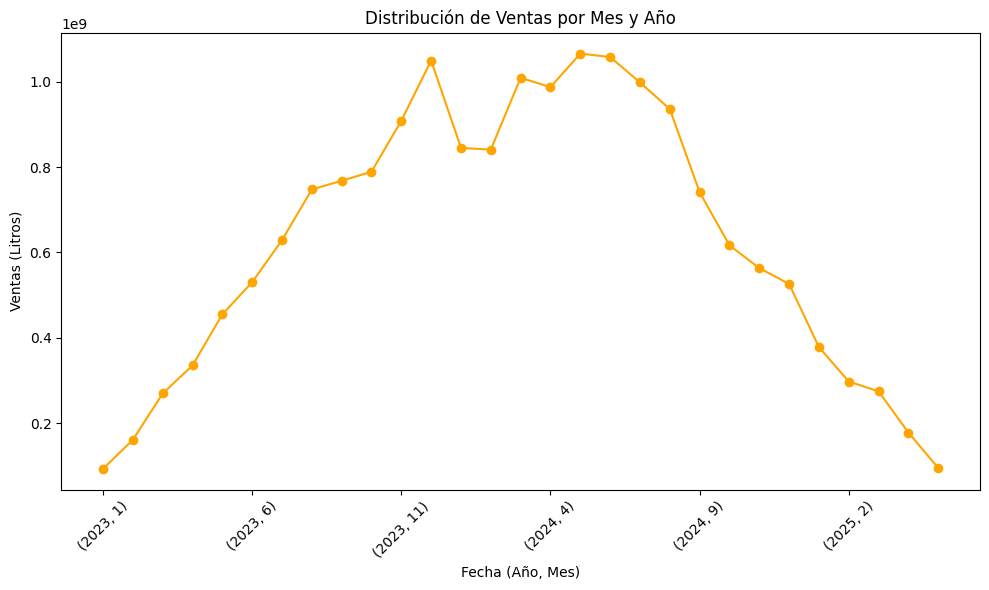

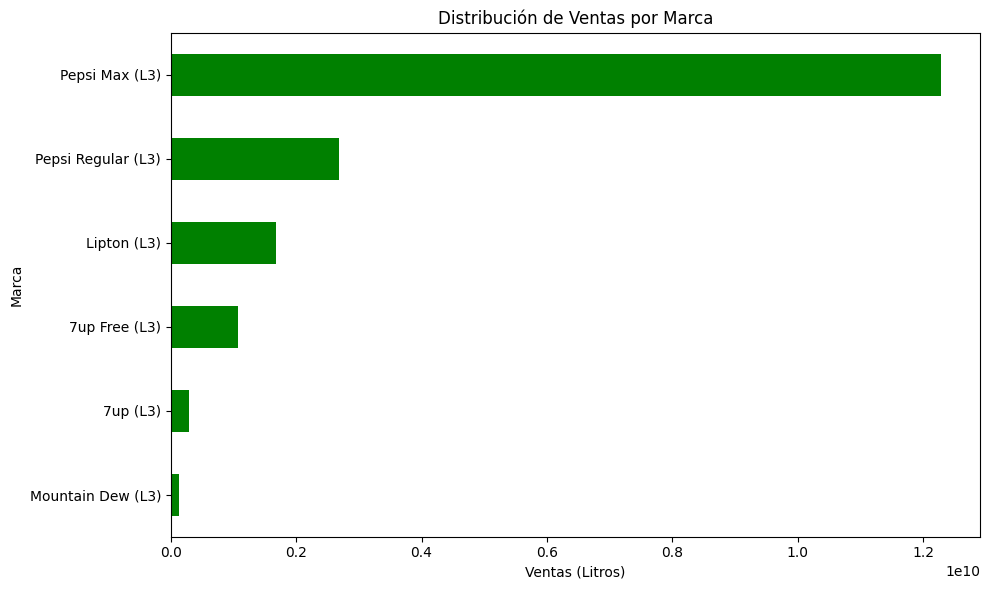

In [17]:
import matplotlib.pyplot as plt

# Gráfico de la distribución de ventas por país
plt.figure(figsize=(10, 6))
ventas_pais.sort_values().plot(kind='barh', color='skyblue')
plt.title('Distribución de Ventas por País')
plt.xlabel('Ventas (Litros)')
plt.ylabel('País')
plt.tight_layout()
plt.show()

# Gráfico de la distribución de ventas por mes y año
plt.figure(figsize=(10, 6))
ventas_mes_anio.plot(kind='line', marker='o', color='orange')
plt.title('Distribución de Ventas por Mes y Año')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de la distribución de ventas por marca
plt.figure(figsize=(10, 6))
ventas_marca.sort_values().plot(kind='barh', color='green')
plt.title('Distribución de Ventas por Marca')
plt.xlabel('Ventas (Litros)')
plt.ylabel('Marca')
plt.tight_layout()
plt.show()


-  En la gráfica de ventas por país, es evidente que "Great Britain" tiene una cantidad significativamente mayor de ventas en comparación con otros países.
- La gráfica por mes y año muestra claramente cómo las ventas suben y bajan a lo largo del tiempo.
- Para las marcas, es fácil ver que "Pepsi Max" domina en ventas.

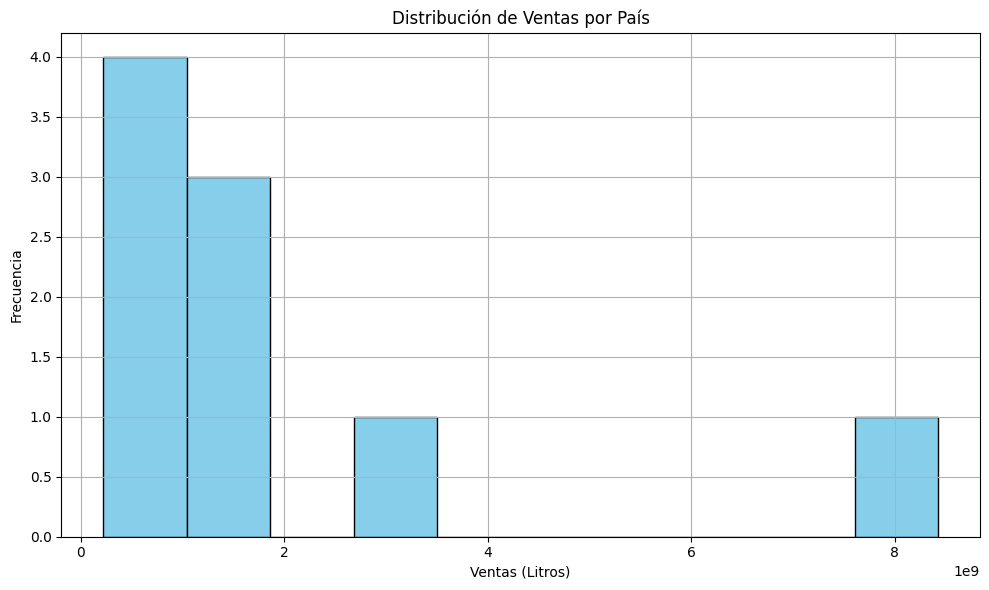

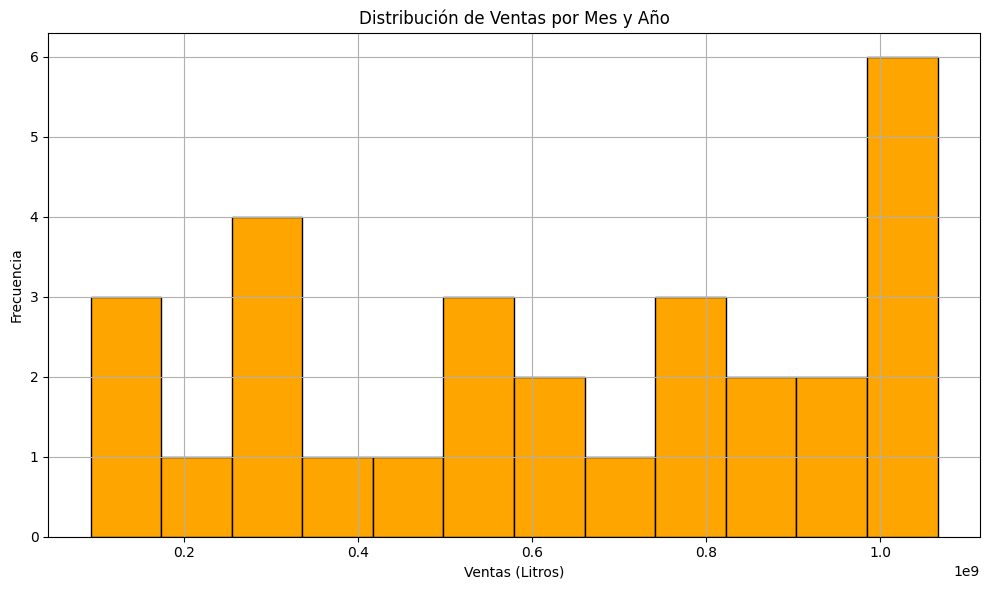

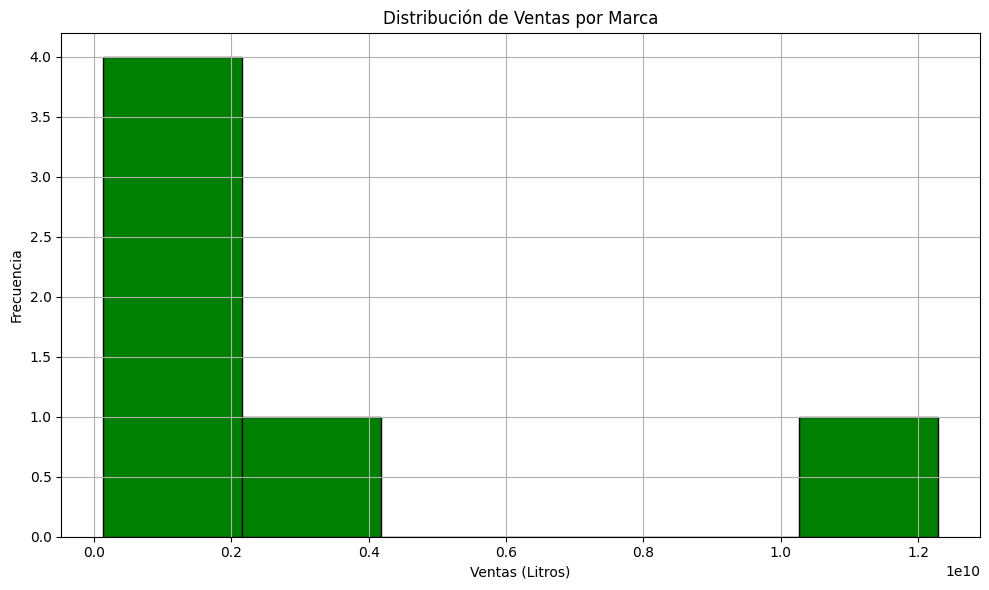

In [19]:
# Gráficos de las distribuciones solicitadas en el punto 8 como histogramas

# Distribución de ventas por país
plt.figure(figsize=(10, 6))
df.groupby('COUNTRY')['AMOUNT'].sum().plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas por País')
plt.xlabel('Ventas (Litros)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribución de ventas por mes y año
plt.figure(figsize=(10, 6))
df.groupby(['YEAR', 'MONTH'])['AMOUNT'].sum().plot(kind='hist', bins=12, color='orange', edgecolor='black')
plt.title('Distribución de Ventas por Mes y Año')
plt.xlabel('Ventas (Litros)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribución de ventas por marca
plt.figure(figsize=(10, 6))
df.groupby('SUBBRAND')['AMOUNT'].sum().plot(kind='hist', bins=6, color='green', edgecolor='black')
plt.title('Distribución de Ventas por Marca')
plt.xlabel('Ventas (Litros)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()


9. Tendencia y estacionalidad

Vamos a analizar la tendencia y estacionalidad de las ventas del país con menos ventas y la marca con más ventas.

GRAFICO DE TENDENCIAS: diagrama de lineas

Primero agrupamos los datos por país y marca, sumamos las ventas de cada grupo (AMOUNT), y encontramos el país con menos ventas.

Como nos interesa ver cómo cambian las ventas mes a mes, agrupamos las ventas mensuales por año y mes.

In [20]:
# País con menos ventas
pais_menos_ventas = df.groupby('COUNTRY')['AMOUNT'].sum().idxmin()
ventas_pais_menos = df[df['COUNTRY'] == pais_menos_ventas].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print(f"País con menos ventas: {pais_menos_ventas}")

País con menos ventas: Spain


Generamos un gráfico de líneas, que es el más ideal para visualizar como cambian las ventas a lo largo del tiempo, lo que nos permite detectar tendencias y estacionalidad en los datos.

Cada punto representa el volumen de ventas en un mes específico, y las líneas conectan estos puntos para mostrar la evolución temporal.

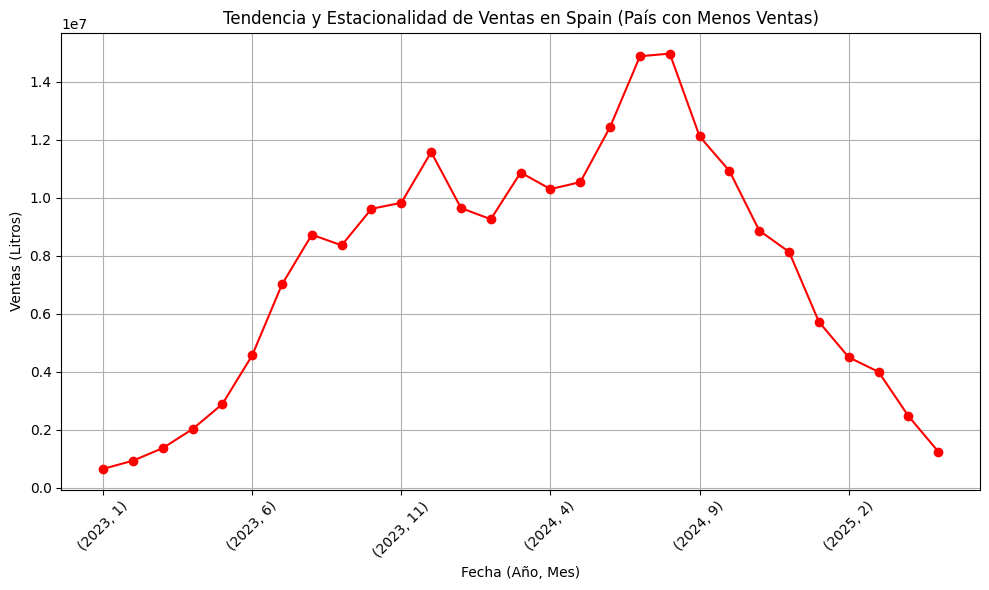

In [21]:
# Gráfico de tendencia y estacionalidad para el país con menos ventas
plt.figure(figsize=(10, 6))
ventas_pais_menos.plot(kind='line', marker='o', color='red')
plt.title(f'Tendencia y Estacionalidad de Ventas en {pais_menos_ventas} (País con Menos Ventas)')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa un crecimiento constante desde enero de 2023, alcanzando su punto máximo en agosto de 2024, seguido de una disminución.

Realizamos los pasos anteriores pero en vez de identificar el país con menos ventas, ahora queremos encontrar la marca con más ventas.

In [22]:
# Marca con más ventas
marca_mas_ventas = df.groupby('SUBBRAND')['AMOUNT'].sum().idxmax()
ventas_marca_mas = df[df['SUBBRAND'] == marca_mas_ventas].groupby(['YEAR', 'MONTH'])['AMOUNT'].sum()

print(f"Marca con más ventas: {marca_mas_ventas}")

Marca con más ventas: Pepsi Max (L3)


Generamos el gráfico que nos permitirá tener una mejor visualización de la temporalidad.

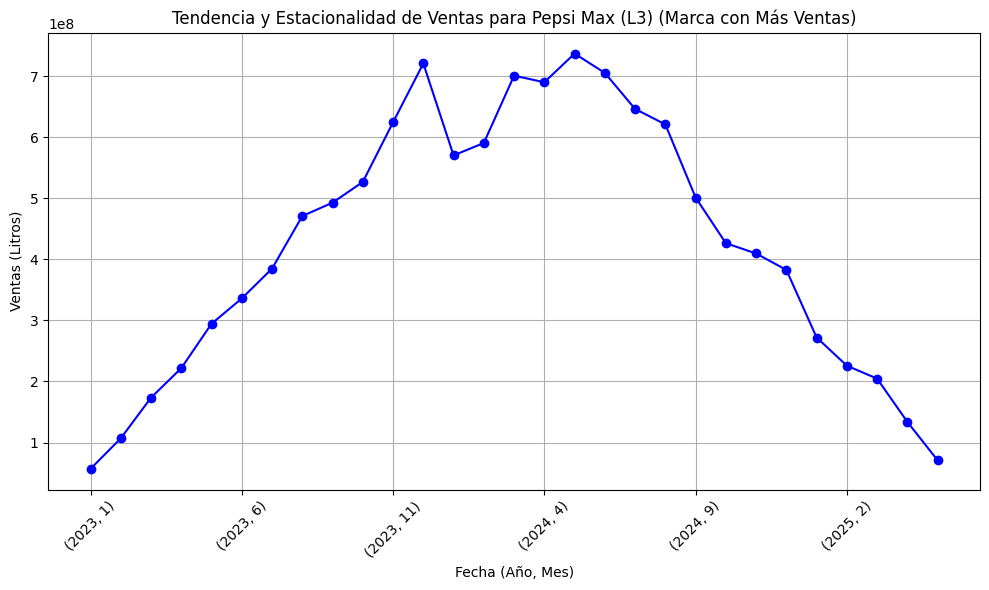

In [23]:
# Gráfico de tendencia y estacionalidad para la marca con más ventas
plt.figure(figsize=(10, 6))
ventas_marca_mas.plot(kind='line', marker='o', color='blue')
plt.title(f'Tendencia y Estacionalidad de Ventas para {marca_mas_ventas} (Marca con Más Ventas)')
plt.xlabel('Fecha (Año, Mes)')
plt.ylabel('Ventas (Litros)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Las ventas de Pepsi Max siguen una tendencia similar, con un aumento desde principios de 2023, alcanzando su máximo a finales de 2023, y luego disminuyendo de manera sostenida.

10. Predicciones en España y precisión

Queremos comparar las predicciones con las ventas reales específicamente para España.

- AI_forecast indica las predicciones, por eso filtramos esas filas en predicciones_espana.
- actual indica las ventas reales, que almacenamos en ventas_reales_espana.

In [24]:
predicciones_espana = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'AI_forecast')]
ventas_reales_espana = df[(df['COUNTRY'] == 'Spain') & (df['SCENARIO'] == 'actual')]

Con la función merge combinamos las predicciones con las ventas reales basándonos en: YEAR, MONTH y SUBBRAND

Esto nos asegura que estamos comparando la predicción correcta con la venta real del mismo producto en el mismo periodo de tiempo.

In [25]:
comparacion_general = pd.merge(predicciones_espana, ventas_reales_espana, on=['YEAR', 'MONTH', 'SUBBRAND'], suffixes=('_pred', '_real'))

Queremos medir la precisión de las predicciones. Para ello calculamos el  error absoluto, que es la diferencia entre la precicción y la venta real, y el error porcentual nos da una idea del tamaño del error relativo a las ventas reales.

In [26]:
comparacion_general['Error_Absoluto'] = abs(comparacion_general['AMOUNT_pred'] - comparacion_general['AMOUNT_real'])
comparacion_general['Error_Porcentual'] = (comparacion_general['Error_Absoluto'] / comparacion_general['AMOUNT_real']) * 100

Mostramos los resultados de la comparación, incluyendo los valores predichos, los valores reales y los errores.

In [27]:
comparacion_general[['YEAR', 'MONTH', 'SUBBRAND', 'AMOUNT_pred', 'AMOUNT_real', 'Error_Absoluto', 'Error_Porcentual']].head()

,YEAR,MONTH,SUBBRAND,AMOUNT_pred,AMOUNT_real,Error_Absoluto,Error_Porcentual
0,2023,12,Pepsi Max (L3),88501.980847,105442.112234,16940.131387,16.065812
1,2023,12,Pepsi Regular (L3),134268.151080,115494.267625,18773.883456,16.255251
2,2024,1,7up Free (L3),70144.329753,60318.994231,9825.335522,16.288958
3,2024,4,7up (L3),38882.921227,74882.992962,36000.071735,48.075097
4,2024,1,Pepsi Regular (L3),132236.387105,113340.611790,18895.775315,16.671672


Para comprobar que las predicciones son buenas podemos hacerlo calculando el Error Absoluto Promedio y el Error Porcentual Promedio.

In [28]:
MAE = comparacion_general['Error_Absoluto'].mean()
MAPE = comparacion_general['Error_Porcentual'].mean()

print(f"Error Absoluto Promedio (MAE): {MAE}")
print(f"Error Porcentual Promedio (MAPE): {MAPE}")

Error Absoluto Promedio (MAE): 15741.400362505825
Error Porcentual Promedio (MAPE): 17.7866566152518


En general, las predicciones son moderadamente precisas, con un error porcentual promedio por debajo del 20%. Esto indica que, aunque las predicciones no son perfectas, están relativamente cerca de las ventas reales en la mayoría de los casos.